In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn import neighbors

In [2]:
# On va travailler sur un jeu de données assez connu, qui est celui des images de chiffres annotées.
mnist = fetch_openml('mnist_784', version=1)

In [3]:
mnist.data.shape

(70000, 784)

In [4]:
mnist.target.shape

(70000,)

In [25]:
# Le dataset est relativement petit, mais reste tout de même trop gros pour un algorithme kNN. On va donc en tirer un échantillon.
sample = np.random.randint(70000, size=5000)
data = mnist.data.iloc[sample]
target = mnist.target.iloc[sample]

In [26]:
# On va séparer notre data set en un training set et un testing set.
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

In [27]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

# On calcule ensuite l'erreur
error = 1 - knn.score(xtest, ytest)
print(error)

0.06599999999999995


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

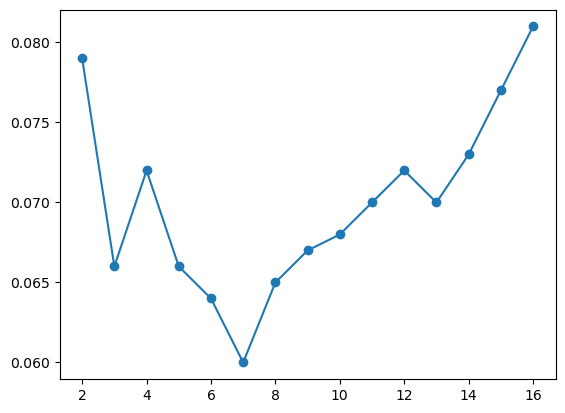

In [28]:
# Pour savoir s'il vaut mieux utiliser un 3-NN ou un 17-NN, testons chaque modèle.
errors = {}
for k in range(2, 17):
    knn = neighbors.KNeighborsClassifier(k)
    knn.fit(xtrain, ytrain)
    errors[k] = 1 - knn.score(xtest, ytest)

plt.plot(errors.keys(), errors.values(), 'o-')
plt.show()

In [20]:
errors.values()

dict_values([0.07699999999999996, 0.06599999999999995, 0.052000000000000046, 0.05900000000000005, 0.05600000000000005, 0.05700000000000005, 0.06499999999999995, 0.06799999999999995, 0.06999999999999995, 0.07299999999999995, 0.07499999999999996, 0.07699999999999996, 0.08099999999999996, 0.07999999999999996, 0.08399999999999996])